# import packages

In [148]:
import requests
import pandas as pd
import jalali_pandas
import matplotlib.pyplot as plt
import plotly.express as px
import requests
import datetime
import calendar
import jdatetime
from bs4 import BeautifulSoup
from lxml import etree

# main function

In [141]:
def get_tgju_data(symbol):
    r = requests.get(f'https://platform.tgju.org/fa/tvdata/history?symbol={symbol}')
    df_data = r.json()
    df_data = pd.DataFrame({'Date':df_data['t'],'Open':df_data['o'],'High':df_data['h'],'Low':df_data['l'],'Close':df_data['c'],})
    df_data['Date'] = df_data['Date'].apply(lambda x: datetime.datetime.fromtimestamp(x))
    df_data = df_data.set_index('Date')
    df_data.index = df_data.index.to_period("D")
    df_data.index=df_data.index.to_series().astype(str)
    df_data = df_data.reset_index()
    df_data['Date'] = pd.to_datetime(df_data['Date'])
    df_data['Weekday']=df_data['Date'].dt.weekday
    df_data['Weekday'] = df_data['Weekday'].apply(lambda x: calendar.day_name[x])
    df_data['J-Date']=df_data['Date'].apply(lambda x: str(jdatetime.date.fromgregorian(date=x.date())))
    df_data = df_data.set_index('J-Date')
    df_data=df_data[['Date','Weekday','Open','High','Low','Close']]
    return df_data

In [165]:
def get_dict_of_symbols(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.content, "html.parser")
    dom = etree.HTML(str(soup))
    row = dom.xpath('//table/tbody/tr/th/text()')
    symbol = dom.xpath('//table/tbody/tr/@data-market-row')
    df = (pd.DataFrame({'type': row, 'symbol': symbol})[:-11]).set_index('type')
    df['SYMBOL'] = df['symbol'].apply(lambda x: x.upper()) 
    symbol_dict = df.to_dict('series')
    return df, symbol_dict

# get data

In [166]:
df, symbol_dict = get_dict_of_symbols(url)

In [168]:
df.head()

,symbol,SYMBOL
type,,
انس طلا,ons,ONS
انس نقره,silver,SILVER
انس پلاتین,platinum,PLATINUM
انس پالادیوم,palladium,PALLADIUM
مثقال طلا,mesghal,MESGHAL


<AxesSubplot:title={'center':'mesghal'}, xlabel='J-Date'>

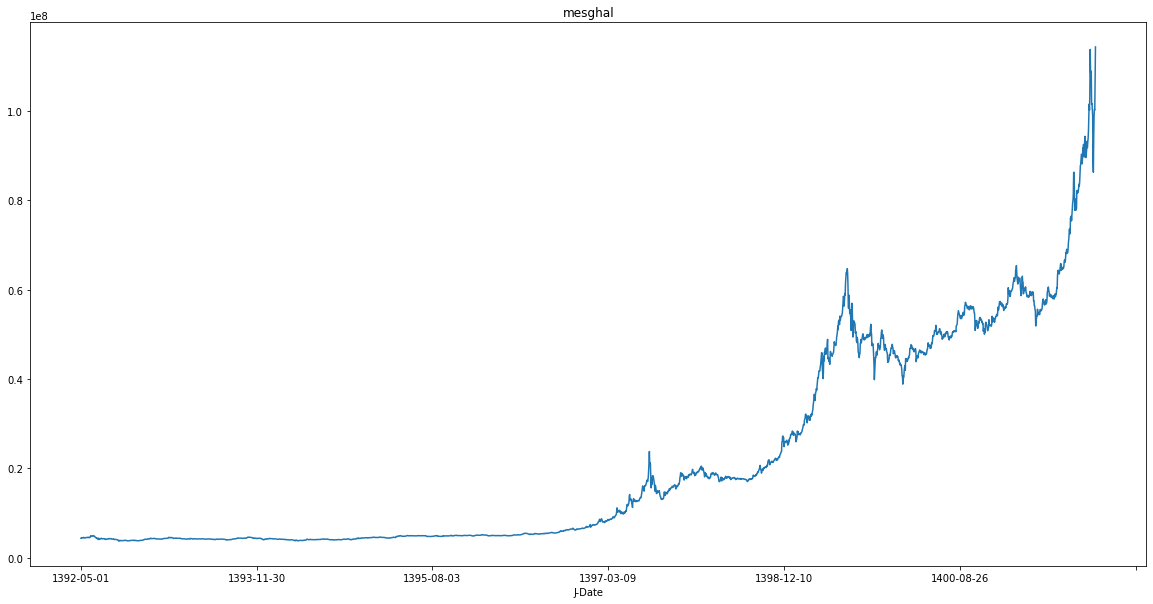

In [159]:
get_tgju_data(symbol_dict['SYMBOL']['مثقال طلا'])['Close'].plot(figsize = (20, 10), title = 'mesghal')